## Exploratory Data Analysis - campaign.csv

In [24]:
import pandas as pd
import numpy as np
import category_encoders as ce
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [25]:
#!pip install category_encoders

In [26]:
pd.set_option('display.max_rows', 25000)
pd.set_option('display.max_columns', 25000)

## Explore campaign

In [27]:
campaign_load_df = pd.read_csv('Campaign.csv')
campaign_load_df.head(2)

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No
1,2.764970e+12,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No


In [28]:
prof = ProfileReport(campaign_load_df)
prof.to_file(output_file='campaign_report.html')

Create a copy

In [29]:
campaign_df = campaign_load_df.copy()
campaign_df.head(5)

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No
1,2.764970e+12,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,12,5,4,1,smithvanessa@coles.org,No
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,No
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No


Checking info

In [30]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32060 entries, 0 to 32059
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   participant_id        32060 non-null  float64
 1   name_title            19859 non-null  object 
 2   first_name            32060 non-null  object 
 3   last_name             32060 non-null  object 
 4   age                   32060 non-null  int64  
 5   postcode              32060 non-null  object 
 6   marital_status        32060 non-null  object 
 7   education             32060 non-null  object 
 8   job_title             32060 non-null  object 
 9   occupation_level      32060 non-null  int64  
 10  education_num         32060 non-null  int64  
 11  familiarity_FB        32060 non-null  int64  
 12  view_FB               32060 non-null  int64  
 13  interested_insurance  32060 non-null  int64  
 14  company_email         32060 non-null  object 
 15  created_account    

User describe() to check the percentiles

In [31]:
campaign_df.describe(percentiles = [0.0,0.05,0.25,0.5,0.75,0.95,0.97,0.99])

,participant_id,age,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance
count,3.206000e+04,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000
mean,4.973681e+12,38.564816,7.757673,13.207611,5.290331,5.170930,0.424891
std,2.883537e+12,13.637532,3.859709,3.353797,2.673795,2.550475,0.494334
min,8.859368e+07,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000
0%,8.859368e+07,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5%,4.973099e+11,19.000000,2.000000,6.000000,1.000000,1.000000,0.000000
25%,2.493678e+12,28.000000,5.000000,12.000000,3.000000,3.000000,0.000000
50%,4.962955e+12,37.000000,8.000000,13.000000,5.000000,5.000000,0.000000
75%,7.470135e+12,48.000000,10.000000,16.000000,8.000000,7.000000,1.000000
95%,9.487760e+12,63.000000,14.000000,18.000000,9.000000,9.000000,1.000000


Check shape

In [32]:
campaign_df.shape

(32060, 16)

Check for missing values

In [33]:
round((campaign_df.isnull().sum()/len(campaign_df))*100,2)

participant_id           0.00
name_title              38.06
first_name               0.00
last_name                0.00
age                      0.00
postcode                 0.00
marital_status           0.00
education                0.00
job_title                0.00
occupation_level         0.00
education_num            0.00
familiarity_FB           0.00
view_FB                  0.00
interested_insurance     0.00
company_email            0.00
created_account         90.56
dtype: float64

### EDA : Filter only available target data - before imputing

#### 1. created_account(Target column) - 
Majority of the customers have not switched and hence it can be assumed that the missing values have also not switched. Hence filling it with 'No'

In [34]:
campaign_df['created_account'].value_counts()

No     2787
Yes     240
Name: created_account, dtype: int64

In [35]:
#substitute = {'Yes' : 1, 'No' : 0}
#campaign_df['created_account'] = campaign_df['created_account'].map(substitute)

#### 2. Age

In [36]:
campaign_df['age_by_decade'] = pd.cut(x=campaign_df['age'], bins=[20, 29, 39, 49, 59, 69, 79, 89], labels=['20s', '30s', '40s', '50s', '60s', '70s', '80s'])
campaign_df['age_by_decade'].value_counts()

30s    8479
20s    7200
40s    7057
50s    4343
60s    1981
70s     502
80s      75
Name: age_by_decade, dtype: int64

In [37]:
ohe = OneHotEncoder(sparse=False)
X = campaign_df['age_by_decade']
age_by_decade_df = pd.DataFrame(ohe.fit_transform(np.array(X).reshape(-1, 1)))
age_by_decade_df.columns = ['age_by_decade_20s','age_by_decade_30s','age_by_decade_40s','age_by_decade_50s','age_by_decade_60s','age_by_decade_70s','age_by_decade_80s','age_by_decade_90s']
age_by_decade_df.drop('age_by_decade_90s',axis =1, inplace=True)

In [38]:
campaign_df = pd.concat([campaign_df,age_by_decade_df],axis=1)
campaign_df.head(5)

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.764970e+12,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,12,5,4,1,smithvanessa@coles.org,No,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,No,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0


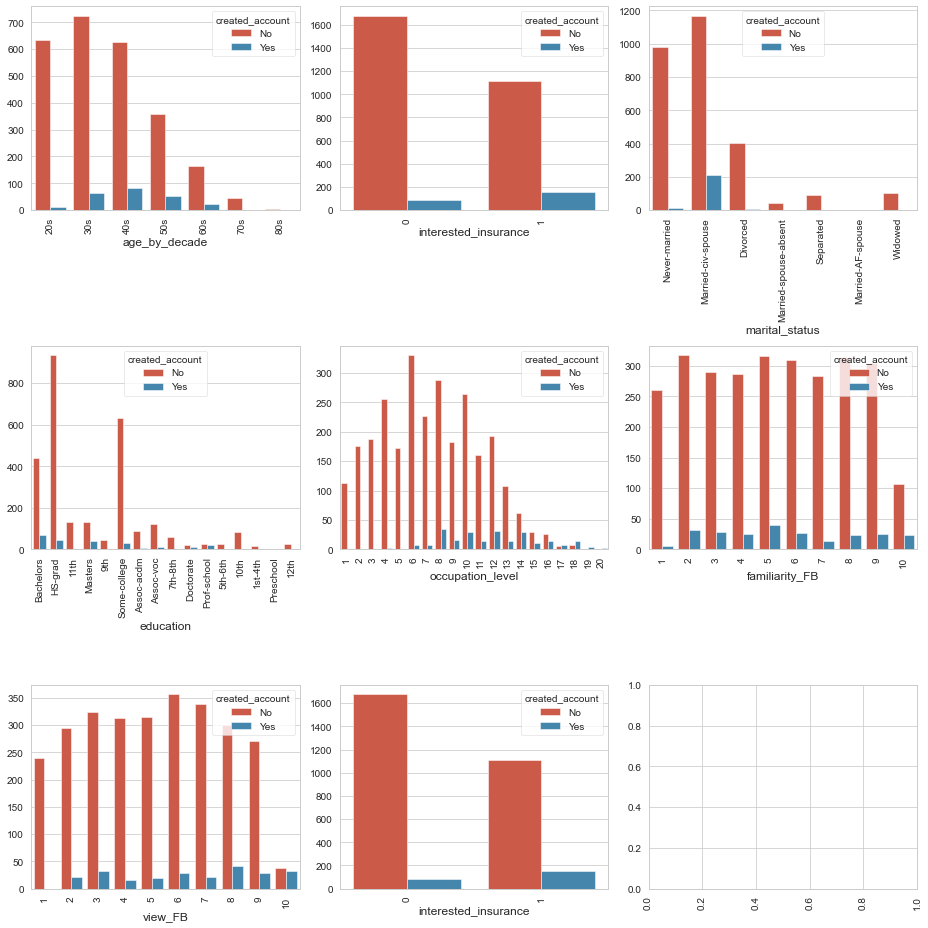

In [40]:
fig, axis = plt.subplots(3,3, figsize = (13,13))

plt.style.use('ggplot')
sns.set_style('whitegrid')

plt1 = sns.countplot(x = 'age_by_decade', data = campaign_df, hue = 'created_account', ax = axis[0][0])
plt1.set(xlabel = 'age_by_decade', ylabel= '')

plt1 = sns.countplot(x = 'interested_insurance', data = campaign_df, hue = 'created_account', ax = axis[0][1])
plt1.set(xlabel = 'interested_insurance', ylabel= '')

plt1 = sns.countplot(x = 'marital_status', data = campaign_df, hue = 'created_account', ax = axis[0][2])
plt1.set(xlabel = 'marital_status', ylabel= '')

plt1 = sns.countplot(x = 'education', data = campaign_df, hue = 'created_account', ax = axis[1][0])
plt1.set(xlabel = 'education', ylabel= '')

plt1 = sns.countplot(x = 'occupation_level', data = campaign_df, hue = 'created_account', ax = axis[1][1])
plt1.set(xlabel = 'occupation_level', ylabel= '')

plt1 = sns.countplot(x = 'familiarity_FB', data = campaign_df, hue = 'created_account', ax = axis[1][2])
plt1.set(xlabel = 'familiarity_FB', ylabel= '')

plt1 = sns.countplot(x = 'view_FB', data = campaign_df, hue = 'created_account', ax = axis[2][0])
plt1.set(xlabel = 'view_FB', ylabel= '')

plt1 = sns.countplot(x = 'interested_insurance', data = campaign_df, hue = 'created_account', ax = axis[2][1])
plt1.set(xlabel = 'interested_insurance', ylabel= '')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('features vs credited_account')
plt.show()

In [238]:
pd.DataFrame(campaign_df['postcode'].value_counts())

,postcode
EH8 3BN,4
EH4 7AZ,3
EH9 4BH,3
EH7 3RR,3
EH2 5RS,3
...,...
EH88 3XE,1
OX92 1PD,1
EH0 2PG,1
EH22 2LR,1


In [234]:
campaign_df['interested_insurance'].value_counts()

0    18438
1    13622
Name: interested_insurance, dtype: int64

No     2787
Yes     240
Name: created_account, dtype: int64

In [218]:
#name_title has missing values and is not useful for any model. For now eliminating and not imputing.
#Need further exploration to see if any method can be used to impute it
#Predict gender
campaign_df['name_title'].value_counts()

Mr.     10704
Mrs.     2726
Miss     2638
Ms.      2610
Dr.      1181
Name: name_title, dtype: int64

In [195]:
campaign_df['name_title'].isnull().sum()

12201

In [196]:
campaign_df['name_title']= campaign_df['name_title'].fillna(' ')

In [197]:
campaign_df['full_name'] = campaign_df['name_title'] + ' ' + campaign_df['first_name'] + ' ' + campaign_df['last_name']
campaign_df.head(5)

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account,full_name
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No,Mr. Dale Coles
1,2.764970e+12,,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No,Joel Allen
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,12,5,4,1,smithvanessa@coles.org,No,Mr. Craig Davis
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,No,Mr. Brandon Thornton
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No,Miss Brett Fletcher


In [198]:
campaign_df['name_title'].value_counts()

        12201
Mr.     10704
Mrs.     2726
Miss     2638
Ms.      2610
Dr.      1181
Name: name_title, dtype: int64

In [199]:
campaign_df['marital_status'].value_counts()

Married-civ-spouse       14747
Never-married            10531
Divorced                  4365
Separated                 1007
Widowed                    976
Married-spouse-absent      411
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [200]:
ohe = OneHotEncoder(sparse=False)
X = campaign_df['marital_status']
marital_status_df = pd.DataFrame(ohe.fit_transform(np.array(X).reshape(-1, 1)))
marital_status_df.columns = ['marital_status_divorced','marital_status_married-AF-spouse','marital_status_married-civ-spouse','marital_status_married-spouse-absent','marital_status_never-married','marital_status_separated','marital_status_widowed']
marital_status_df.drop('marital_status_married-AF-spouse',axis =1, inplace=True)

In [201]:
campaign_df = pd.concat([campaign_df,marital_status_df],axis=1)
campaign_df.head(1)

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account,full_name,marital_status_divorced,marital_status_married-civ-spouse,marital_status_married-spouse-absent,marital_status_never-married,marital_status_separated,marital_status_widowed
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No,Mr. Dale Coles,0.0,0.0,0.0,1.0,0.0,0.0


In [202]:
campaign_df['education'].value_counts()

HS-grad         10347
Some-college     7190
Bachelors        5278
Masters          1693
Assoc-voc        1357
11th             1159
Assoc-acdm       1050
10th              919
7th-8th           634
Prof-school       567
9th               504
12th              419
Doctorate         402
5th-6th           328
1st-4th           165
Preschool          48
Name: education, dtype: int64

In [203]:
oe = OrdinalEncoder(categories = [['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Some-college','Bachelors','Masters','Assoc-voc','Assoc-acdm','Prof-school','Doctorate']])
X = campaign_df['education']
education_df = pd.DataFrame(oe.fit_transform(np.array(X).reshape(-1,1)))
education_df.columns = ['education_encoded']
education_df


,education_encoded
0,10.0
1,10.0
2,8.0
3,6.0
4,10.0
...,...
32055,8.0
32056,7.0
32057,10.0
32058,9.0


In [204]:
campaign_df = pd.concat([campaign_df,education_df],axis=1)
campaign_df.head(1)

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account,full_name,marital_status_divorced,marital_status_married-civ-spouse,marital_status_married-spouse-absent,marital_status_never-married,marital_status_separated,marital_status_widowed,education_encoded
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No,Mr. Dale Coles,0.0,0.0,0.0,1.0,0.0,0.0,10.0


### Postcode

#Frequency encoding : Ruled out as postcode will lose a lot of information value due to multiple postcodes having the same count

postcode_freq_dict = campaign_df['postcode'].value_counts().to_dict()

campaign_df['postcode'] = campaign_df['postcode'].map(postcode_freq_dict)

campaign_df.head()

In [205]:
campaign_df['postcode'].value_counts().sort_values(ascending=False).head(10)

EH8 3BN    4
EH7 3TX    3
EH3 4DD    3
EH3 8EJ    3
EH6 0UW    3
EH7 9JS    3
EH6 2GW    3
EH3 2JG    3
EH6 3AG    3
EH7 4EN    3
Name: postcode, dtype: int64

In [206]:
campaign_df['postcode'].value_counts().sort_values(ascending=False).tail(10)

SN19 9UX    1
SN90 5QN    1
EH85 1RU    1
SN58 0EW    1
EH2 3NA     1
EH5M 0AG    1
EH7B 7ZN    1
EH88 3FZ    1
SN99 8FW    1
EH95 4RL    1
Name: postcode, dtype: int64

In [207]:
campaign_df['postcode'].nunique()

31398

In [208]:
postcode_list = campaign_df['postcode'].tolist()

In [209]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(postcode_list)
campaign_df['postcode_encoded'] = pd.DataFrame(le.transform(postcode_list))

In [210]:
campaign_df.head(5)

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account,full_name,marital_status_divorced,marital_status_married-civ-spouse,marital_status_married-spouse-absent,marital_status_never-married,marital_status_separated,marital_status_widowed,education_encoded,postcode_encoded
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No,Mr. Dale Coles,0.0,0.0,0.0,1.0,0.0,0.0,10.0,9758
1,2.764970e+12,,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No,Joel Allen,0.0,1.0,0.0,0.0,0.0,0.0,10.0,22597
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,12,5,4,1,smithvanessa@coles.org,No,Mr. Craig Davis,1.0,0.0,0.0,0.0,0.0,0.0,8.0,18411
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,No,Mr. Brandon Thornton,0.0,1.0,0.0,0.0,0.0,0.0,6.0,5862
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No,Miss Brett Fletcher,0.0,1.0,0.0,0.0,0.0,0.0,10.0,26281


from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(n_features=2**4)
campaign_df['postcode_']= vectorizer.fit_transform(campaign_df['postcode'])

In [168]:
campaign_df['created_account'] = campaign_df['created_account'].fillna('No')
campaign_df['created_account'].value_counts()

No     31820
Yes      240
Name: created_account, dtype: int64

In [170]:
job_title_df = pd.DataFrame(campaign_df['job_title'].value_counts())
job_title_df.reset_index(inplace=True)
job_title_df.columns = ['job_title','count']
job_title_df.head(1)

,job_title,count
0,"Accountant, chartered",484


In [171]:
job_title = campaign_df['job_title'].tolist()

In [172]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(job_title)
campaign_df['job_title_encoded'] = pd.DataFrame(le.transform(job_title))

In [173]:
campaign_df.head()

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account,full_name,marital_status_divorced,marital_status_married-civ-spouse,marital_status_married-spouse-absent,marital_status_never-married,marital_status_separated,marital_status_widowed,education_encoded,postcode_encoded,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,job_title_encoded
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,0,Mr. Dale Coles,0.0,0.0,0.0,1.0,0.0,0.0,10.0,9758,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,277
1,2.764970e+12,,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,0,Joel Allen,0.0,1.0,0.0,0.0,0.0,0.0,10.0,22597,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,12,5,4,1,smithvanessa@coles.org,0,Mr. Craig Davis,1.0,0.0,0.0,0.0,0.0,0.0,8.0,18411,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,0,Mr. Brandon Thornton,0.0,1.0,0.0,0.0,0.0,0.0,6.0,5862,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,250
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,0,Miss Brett Fletcher,0.0,1.0,0.0,0.0,0.0,0.0,10.0,26281,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,340


In [174]:
campaign_df.drop(['participant_id', 'name_title', 'first_name', 'last_name','postcode','marital_status', 'education','job_title','company_email'], axis = 1, inplace = True)
campaign_df.head()

,age,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,created_account,full_name,marital_status_divorced,marital_status_married-civ-spouse,marital_status_married-spouse-absent,marital_status_never-married,marital_status_separated,marital_status_widowed,education_encoded,postcode_encoded,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,job_title_encoded
0,39,1,17,7,9,0,0,Mr. Dale Coles,0.0,0.0,0.0,1.0,0.0,0.0,10.0,9758,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,277
1,50,4,17,9,6,1,0,Joel Allen,0.0,1.0,0.0,0.0,0.0,0.0,10.0,22597,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16
2,38,12,12,5,4,1,0,Mr. Craig Davis,1.0,0.0,0.0,0.0,0.0,0.0,8.0,18411,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47
3,53,1,9,9,2,0,0,Mr. Brandon Thornton,0.0,1.0,0.0,0.0,0.0,0.0,6.0,5862,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,250
4,28,12,17,8,9,1,0,Miss Brett Fletcher,0.0,1.0,0.0,0.0,0.0,0.0,10.0,26281,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,340


In [175]:
campaign_df.to_csv('campaign_df_cleaned.csv')